Get the geometry from the Kaggle competetion

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [2]:
detData = pd.read_csv("../trackingml/detectors.csv")

In [3]:
detData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18728 entries, 0 to 18727
Data columns (total 21 columns):
volume_id       18728 non-null int64
layer_id        18728 non-null int64
module_id       18728 non-null int64
cx              18728 non-null float64
cy              18728 non-null float64
cz              18728 non-null float64
rot_xu          18728 non-null float64
rot_xv          18728 non-null float64
rot_xw          18728 non-null float64
rot_yu          18728 non-null float64
rot_yv          18728 non-null float64
rot_yw          18728 non-null float64
rot_zu          18728 non-null int64
rot_zv          18728 non-null int64
rot_zw          18728 non-null int64
module_t        18728 non-null float64
module_minhu    18728 non-null float64
module_maxhu    18728 non-null float64
module_hv       18728 non-null int64
pitch_u         18728 non-null float64
pitch_v         18728 non-null float64
dtypes: float64(14), int64(7)
memory usage: 3.0 MB


Get the number of phi modules

In [4]:
layerDataOneRing = [
    detData[(detData["volume_id"] == 8) & (detData["layer_id"] == 2) & (detData["cz"] == 35)],
    detData[(detData["volume_id"] == 8) & (detData["layer_id"] == 4) & (detData["cz"] == 35)],
    detData[(detData["volume_id"] == 8) & (detData["layer_id"] == 6) & (detData["cz"] == 35)],
    detData[(detData["volume_id"] == 8) & (detData["layer_id"] == 8) & (detData["cz"] == 35)],
    detData[(detData["volume_id"] == 13) & (detData["layer_id"] == 2) & (detData["cz"] == 0)],
    detData[(detData["volume_id"] == 13) & (detData["layer_id"] == 4) & (detData["cz"] == 0)],
    detData[(detData["volume_id"] == 13) & (detData["layer_id"] == 6) & (detData["cz"] == 0)],
    detData[(detData["volume_id"] == 13) & (detData["layer_id"] == 8) & (detData["cz"] == 0)],
    detData[(detData["volume_id"] == 17) & (detData["layer_id"] == 2) & (detData["cz"] == 0)],
    detData[(detData["volume_id"] == 17) & (detData["layer_id"] == 4) & (detData["cz"] == 0)],
]
nModulesInPhi = []
for ld in layerDataOneRing:
    nModulesInPhi.append(len(ld))
nModulesInPhi

[16, 32, 52, 78, 40, 56, 78, 102, 120, 152]

In [5]:
layerData = [
    detData[(detData["volume_id"] == 8) & (detData["layer_id"] == 2) ],
    detData[(detData["volume_id"] == 8) & (detData["layer_id"] == 4) ],
    detData[(detData["volume_id"] == 8) & (detData["layer_id"] == 6) ],
    detData[(detData["volume_id"] == 8) & (detData["layer_id"] == 8) ],
    detData[(detData["volume_id"] == 13) & (detData["layer_id"] == 2) ],
    detData[(detData["volume_id"] == 13) & (detData["layer_id"] == 4) ],
    detData[(detData["volume_id"] == 13) & (detData["layer_id"] == 6) ],
    detData[(detData["volume_id"] == 13) & (detData["layer_id"] == 8) ],
    detData[(detData["volume_id"] == 17) & (detData["layer_id"] == 2) ],
    detData[(detData["volume_id"] == 17) & (detData["layer_id"] == 4) ],
]


In [6]:
#detGeo = detector2D(layerData)

from detectorGeo import detectorGeo
detGeo = detectorGeo()
detGeo.initFromFile(layerData,nModulesInPhi)

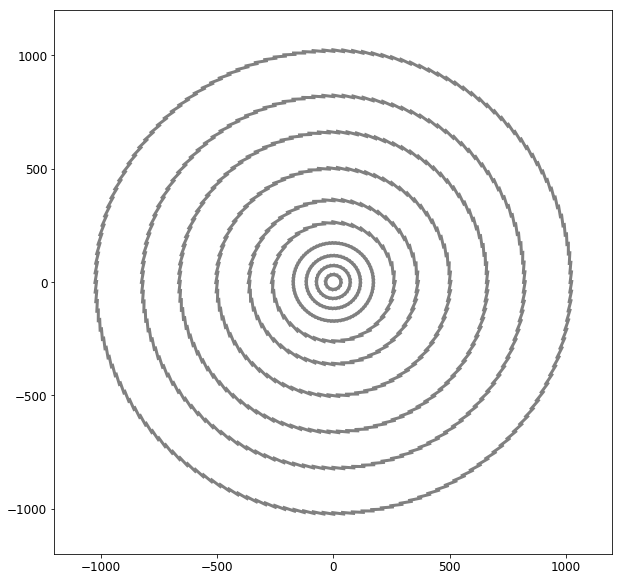

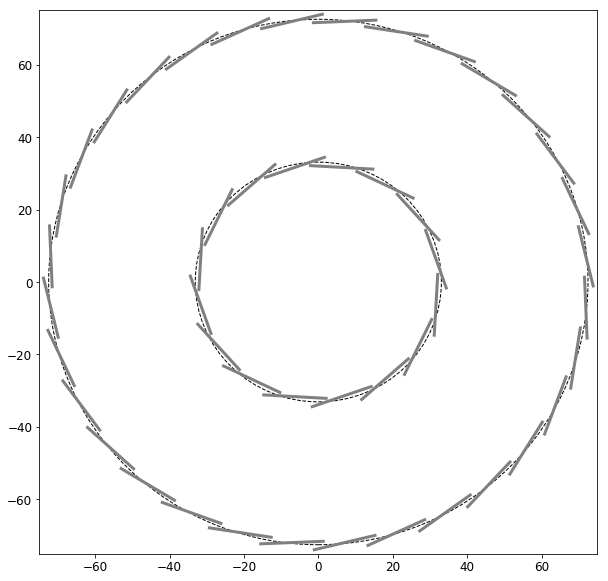

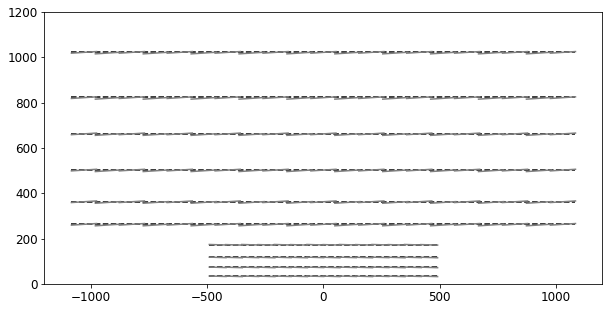

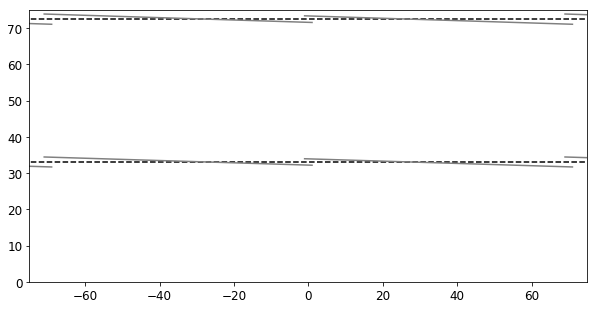

In [7]:
fig, ax = plt.subplots(1, figsize=(10,10))
zoom = 1200
ax.set_xlim((-1*zoom, zoom))
ax.set_ylim((-1*zoom, zoom))

detGeo.drawDetectorXY(ax,True)
    
fig, ax = plt.subplots(1, figsize=(10,10))
zoom = 75
ax.set_xlim((-1*zoom, zoom))
ax.set_ylim((-1*zoom, zoom))

detGeo.drawDetectorXY(ax,True)


fig, ax = plt.subplots(1, figsize=(10,5))
zoom = 1200
ax.set_xlim((-zoom, zoom))
ax.set_ylim((0, zoom))

detGeo.drawDetectorZR(ax,True)


fig, ax = plt.subplots(1, figsize=(10,5))
zoom = 75
ax.set_xlim((-zoom, zoom))
ax.set_ylim((0, zoom))

detGeo.drawDetectorZR(ax,True)

In [8]:
#detGeo.layers[0].mods[0].

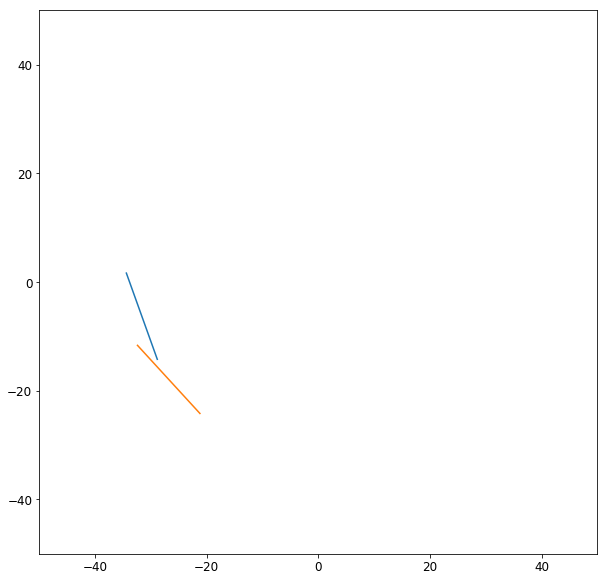

In [9]:
fig, ax = plt.subplots(1, figsize=(10,10))
zoom = 50
ax.set_xlim((-1*zoom, zoom))
ax.set_ylim((-1*zoom, zoom))

testMod0 = detGeo.layers[0].mods[0]
testMod1 = detGeo.layers[0].mods[1]
plt.plot(testMod0.corners_g[1:3,0],testMod0.corners_g[1:3,1])
plt.plot(testMod1.corners_g[1:3,0],testMod1.corners_g[1:3,1])

[[ -28.8579388  -14.2209744 -419.       ]
 [ -28.8579388  -14.2209744 -491.       ]
 [ -34.4026612    1.6376544 -491.       ]
 [ -34.4026612    1.6376544 -419.       ]
 [ -28.8579388  -14.2209744 -419.       ]]
[-419. -491.]
[-419. -491.] [32.17167612 34.44161741]
[-349. -421.] [31.68893587 33.95662467]


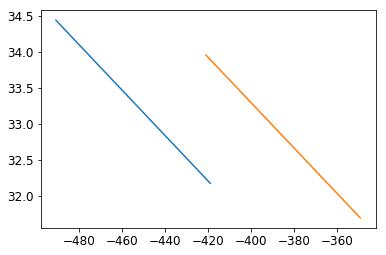

In [10]:
#fig, ax = plt.subplots(1, figsize=(10,10))
#zoom = 50
#ax.set_xlim((-1*zoom, zoom))
#ax.set_ylim((-1*zoom, zoom))
testMod16 = detGeo.layers[0].mods[16]

print(testMod0.corners_g)
print(testMod0.corners_g[0:3:2,2])
#print(testMod0.rs)
print(testMod0.corners_g[0:3:2,2],testMod0.rs[0:3:2])
print(testMod16.corners_g[0:3:2,2],testMod16.rs[0:3:2])
#plt.plot(testMod0.corners_g[1:3,0],testMod0.corners_g[1:3,1])
#plt.plot(testMod1.corners_g[1:3,0],testMod1.corners_g[1:3,1])
#print(((33.9122612)**2+(1.7351944)**2)**0.5)
#print((  (-28.3675388)**2   +  (-14.1234344)**2)**0.5)
plt.plot(testMod0.corners_g[0:3:2,2],testMod0.rs[0:3:2])
plt.plot(testMod16.corners_g[0:3:2,2],testMod16.rs[0:3:2])

Test the helix on plane calculation

In [11]:
p0 = testMod16.corners_g[0]
print(testMod16.corners_g)
v1 = (testMod16.corners_g[0]-testMod16.corners_g[1])
v2 = (testMod16.corners_g[0]-testMod16.corners_g[2])
nhat = np.cross(v1,v2)
nhat *= 1./np.sqrt(nhat.dot(nhat))

print(nhat)
print(p0)
print(p0.dot(nhat))


[[ -28.3675388  -14.1234344 -349.       ]
 [ -28.3675388  -14.1234344 -421.       ]
 [ -33.9122612    1.7351944 -421.       ]
 [ -33.9122612    1.7351944 -349.       ]
 [ -28.3675388  -14.1234344 -349.       ]]
[ 0.94396591  0.33004297 -0.        ]
[ -28.3675388  -14.1234344 -349.       ]
-31.439329788025557


In [12]:
rc = 1000
yc = 0
xc = 1000
w = 1
tanT = 2
z0 = 10

In [13]:
A = nhat[0]*rc*w*w/2
B = (nhat[1]*rc*w+nhat[2]*rc*w/tanT)
C = (z0*nhat[2]-p0.dot(nhat))
yints = np.roots([A,B,C])
yints

array([-0.58550105, -0.11376778])

/Users/johnda/MachineLearning/TrackingToy/TrackHelper.py:138: RuntimeWarning: invalid value encountered in sqrt
  closure_raw_mp = abs(yints_raw-trk_yc+np.sqrt(trk_rc2-(xints_m_raw-trk_xc)**2))
/Users/johnda/MachineLearning/TrackingToy/TrackHelper.py:139: RuntimeWarning: invalid value encountered in sqrt
  closure_raw_mm = abs(yints_raw-trk_yc-np.sqrt(trk_rc2-(xints_m_raw-trk_xc)**2))
/Users/johnda/MachineLearning/TrackingToy/TrackHelper.py:39: RuntimeWarning: invalid value encountered in sqrt
  yp = yc+np.sqrt(r**2-(x-xc)**2)
/Users/johnda/MachineLearning/TrackingToy/TrackHelper.py:41: RuntimeWarning: invalid value encountered in sqrt
  ym = yc-np.sqrt(r**2-(x-xc)**2)


[(8.0, 2.0, 108.0), (8.0, 2.0, 109.0), (8.0, 2.0, 124.0), (8.0, 2.0, 125.0), (8.0, 4.0, 248.0), (8.0, 6.0, 403.0), (8.0, 8.0, 604.0), (8.0, 8.0, 682.0), (13.0, 2.0, 470.0), (13.0, 4.0, 713.0), (13.0, 6.0, 992.0), (13.0, 8.0, 1397.0), (13.0, 8.0, 1398.0), (17.0, 2.0, 1762.0), (17.0, 2.0, 1763.0), (17.0, 4.0, 2381.0), (17.0, 4.0, 2382.0)]
PS Hits:
0.5471317093050619 33.07512759617838 0.5398263186982033
Actual Hits:
[[(8.0, 2.0, 108.0) 0.5107360936067158 31.95639741673125
  -0.019760740109525443]
 [(8.0, 2.0, 109.0) 0.5792772613473409 34.03261612849071
  1.0187728897732136]
 [(8.0, 2.0, 124.0) 0.49503177951615196 31.46138112940355
  -0.26736227589029227]
 [(8.0, 2.0, 125.0) 0.5613442893205132 33.50184280349103
  0.7532726552230358]
 [(8.0, 4.0, 248.0) 2.5391144924899685 71.21644390570196
  19.63084683592281]
 [(8.0, 6.0, 403.0) 6.694323949602777 115.5155137895485 41.85466251566416]
 [(8.0, 8.0, 604.0) 14.772336328729574 171.24967368392285
  69.94281915532433]
 [(8.0, 8.0, 682.0) 14.859513

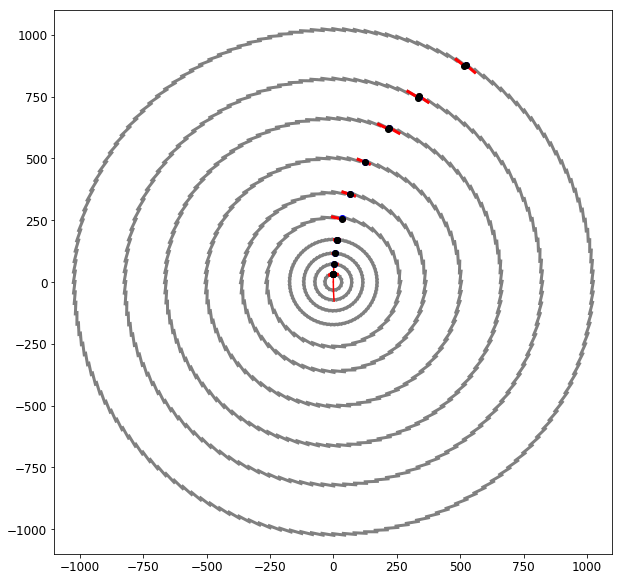

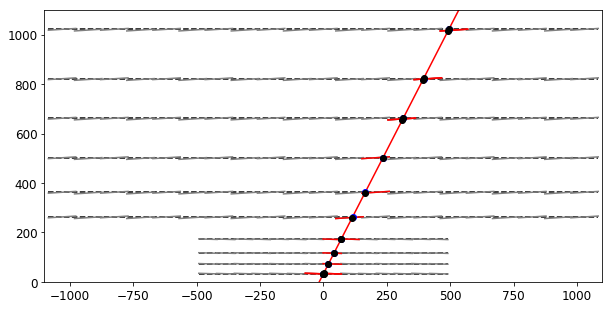

In [14]:
from TrackHelper import drawTrackXY, drawTrackZR
fig, ax = plt.subplots(1, figsize=(10,10))
zoom = 1100
ax.set_xlim((-1*zoom, zoom))
ax.set_ylim((-1*zoom, zoom))

z0 = -16
xs, ys, zs, rs, modulesHit, actualHits = detGeo.getHits3D(rc,np.pi/2,np.arctan(2),z0,1)

actualHits = np.array(actualHits)

detGeo.drawDetectorXY(ax,True)
drawTrackXY(rc,np.pi/2,1)
print(modulesHit)
detGeo.drawDetectorModules(modulesHit)
plt.plot(xs,ys,"bo")
plt.plot(actualHits[:,1],actualHits[:,2],"ko")

fig, ax = plt.subplots(1, figsize=(10,5))
zoom = 1100
ax.set_xlim((-zoom, zoom))
ax.set_ylim((0, zoom))

detGeo.drawDetectorZR(ax,True)
drawTrackZR(np.arctan(2),z0,1,zoom)

xs = np.array(xs)
ys = np.array(ys)
detGeo.drawDetectorModulesZR(modulesHit)

plt.plot(zs,np.sqrt(xs**2+ys**2),"bo")
plt.plot(actualHits[:,3],np.sqrt((actualHits[:,1]**2+actualHits[:,2]**2).astype(np.float64)),"ko")

print("PS Hits:")
print(xs[0],ys[0],zs[0])
print("Actual Hits:")
print(actualHits)


In [15]:
np.array(actualHits)[:,2]

array([31.95639741673125, 34.03261612849071, 31.46138112940355,
       33.50184280349103, 71.21644390570196, 115.5155137895485,
       171.24967368392285, 171.7504636417371, 254.7465008891944,
       354.8958399519908, 484.7301602818624, 624.7373640368323,
       619.8106866091814, 750.959610696347, 746.6549498205076,
       878.5380072858036, 875.2177330256709], dtype=object)

# OK, now lets try to plot the hits of a bunch of tracks

In [16]:
np.random.seed(3)

# Kaggle formats
eventParticles = []
eventTruth = []
eventHits = []

# For plotting 
solutions = []

nTrk = 50*3
hitID = 0

for trkI in range(nTrk):
    ptInv = np.random.uniform(0.01*0.001,1.33*0.001,1)[0]
    phi   = np.random.uniform(0.0,2*np.pi,1)[0]
    q     = 2*np.random.randint(0,2,1)[0]-1
    pt    = 1./ptInv
    z0    = np.random.uniform(-150,150,1)[0]
    theta = np.random.uniform(3*np.pi/4,np.pi/4,1)[0]
    
    eventParticles.append((trkI,pt,phi,theta,z0,q,6))
    
    #xHits, yHits = getHits(pt,phi,q,rDet)
    ps_hitXs, ps_hitYs, ps_hitZs, ps_hitRs, modulesHit, hits = detGeo.getHits3D(pt,phi,theta,z0,q)

    solutions.append([ps_hitXs, ps_hitYs, ps_hitZs, ps_hitRs, pt, phi, theta, z0, q, modulesHit, hits])

    for hitsInfo in hits:
        hitX   = hitsInfo[1]        
        hitY   = hitsInfo[2]                
        hitZ   = hitsInfo[3]                
        eventTruth.append((hitID,trkI,hitX,hitY,hitZ,1.0))
        eventHits .append((hitID,hitX,hitY,hitZ,hitsInfo[0][0],hitsInfo[0][1],hitsInfo[0][2]))        
        hitID += 1



/Users/johnda/MachineLearning/TrackingToy/TrackHelper.py:138: RuntimeWarning: invalid value encountered in sqrt
  closure_raw_mp = abs(yints_raw-trk_yc+np.sqrt(trk_rc2-(xints_m_raw-trk_xc)**2))
/Users/johnda/MachineLearning/TrackingToy/TrackHelper.py:139: RuntimeWarning: invalid value encountered in sqrt
  closure_raw_mm = abs(yints_raw-trk_yc-np.sqrt(trk_rc2-(xints_m_raw-trk_xc)**2))
/Users/johnda/MachineLearning/TrackingToy/TrackHelper.py:136: RuntimeWarning: invalid value encountered in sqrt
  closure_raw_pp = abs(yints_raw-trk_yc+np.sqrt(trk_rc2-(xints_p_raw-trk_xc)**2))
/Users/johnda/MachineLearning/TrackingToy/TrackHelper.py:137: RuntimeWarning: invalid value encountered in sqrt
  closure_raw_pm = abs(yints_raw-trk_yc-np.sqrt(trk_rc2-(xints_p_raw-trk_xc)**2))


## Make reconstructed hits from truth Hits  (add smearing and noise later)

In [17]:

recHits = np.array(eventHits)

np.random.seed(42)
shuffle_index = np.random.permutation(len(recHits))
recHits = recHits[shuffle_index]
recHits[0:10]


array([[1609.        , -599.61957207,  558.82359836, -357.60757987,
          17.        ,    2.        ,  946.        ],
       [1401.        ,   84.35551014,  150.98037117,  104.93260861,
           8.        ,    8.        ,  677.        ],
       [1717.        ,  114.34005303,   19.40388409,  142.80712218,
           8.        ,    6.        ,  496.        ],
       [1054.        ,  114.90964078,   12.57353183,  -23.86212828,
           8.        ,    6.        ,  339.        ],
       [ 307.        ,    6.90951121,  -31.41427795,  116.23391242,
           8.        ,    2.        ,  133.        ],
       [ 432.        ,   23.98581746,  -22.64764034,   60.14076395,
           8.        ,    2.        ,  119.        ],
       [1669.        ,  114.41813413, -128.70204328,  124.18706109,
           8.        ,    8.        ,  653.        ],
       [ 598.        , -346.37991557, -560.10262653, -119.98780081,
          13.        ,    8.        ,  935.        ],
       [1810.        ,  

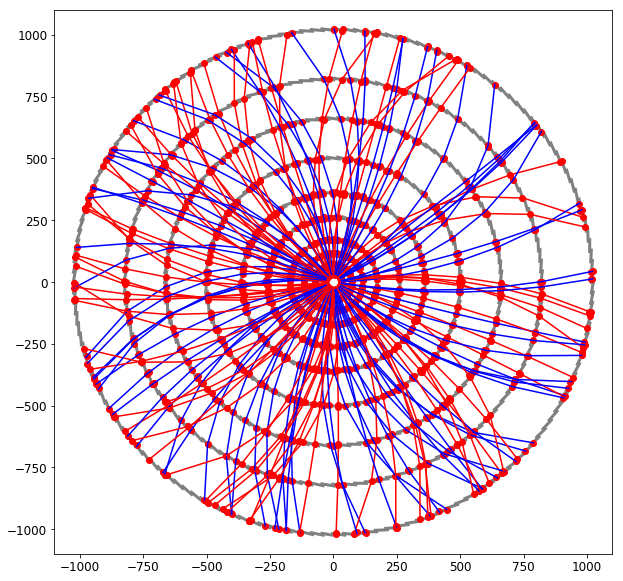

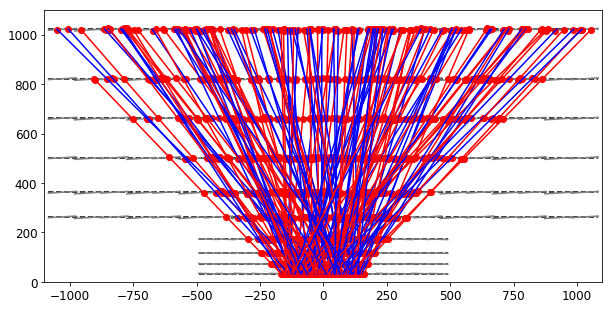

In [18]:
fig, ax = plt.subplots(1, figsize=(10,10))
zoom = 1100
ax.set_xlim((-1*zoom, zoom))
ax.set_ylim((-1*zoom, zoom))

detGeo.drawDetectorXY(ax,True)
plt.plot(recHits[:,1],recHits[:,2],'ro')

for s in solutions:
    color = "b" if (s[8] < 0) else "r"
    plt.plot(s[0],s[1],color)

fig, ax = plt.subplots(1, figsize=(10,5))
zoom = 1100
ax.set_xlim((-zoom, zoom))
ax.set_ylim((0, zoom))

detGeo.drawDetectorZR(ax,True)

plt.plot(recHits[:,3],np.sqrt(recHits[:,2]**2+recHits[:,1]**2),'ro')
for s in solutions:
    color = "b" if (s[8] < 0) else "r"
    plt.plot(s[2],s[3],color)

# Test "Offline"  algorithm (ie: Hough transform) works

First try one track

### Implement the Hough transform

In [19]:
from TrackHelper import getPhiCircle

# given global posision and phi range, return consistent 1/rC
def getHT(hitR, hitPhi, phi):
    # Convert 0-2Pi
    if hitPhi<0: hitPhi += 2*np.pi

    phi_circle = getPhiCircle(phi,1)

    f = 2/hitR*(np.cos(hitPhi-phi_circle))
    return f

In [20]:
# given global posision and z0 range, return consistent theta
def getHT_ZR(hitZ, hitR, z):
    
        
    #f = np.arctan2((hitZ - z),hitR)
    #f[f<0] = f[f<0]+2*np.pi
    f = np.arctan2(hitR,(hitZ - z))
    return f

## Try on one track first

 Draw the track

((8.0, 2.0, 89.0), 32.085580014996275, 3.489351890887022, -115.26399490902864)
((8.0, 4.0, 145.0), 71.92941632726368, 6.969226543218383, -149.26086997184473)
((8.0, 6.0, 235.0), 115.49366333382936, 9.698585803716014, -186.35417905152843)
((8.0, 8.0, 274.0), 170.76590587447333, 11.552541441190556, -233.3275074444876)
((13.0, 2.0, 301.0), 257.02863357306944, 10.86081629777027, -306.5228460360956)
((13.0, 4.0, 364.0), 365.9485584602009, 3.730064379846226, -398.93714516474154)
((13.0, 4.0, 365.0), 359.4321460888255, 4.354222204728558, -393.40378521967705)
((13.0, 6.0, 429.0), 499.14681907871227, -14.61683708445662, -512.3350803423407)
((13.0, 8.0, 458.0), 660.9925106171596, -51.67492916487754, -651.4531582101653)
((17.0, 2.0, 298.0), 815.6309391249051, -103.2102780288451, -786.72641949528)
((17.0, 4.0, 224.0), 1001.0218924322443, -188.10289392510367, -953.6922996405698)


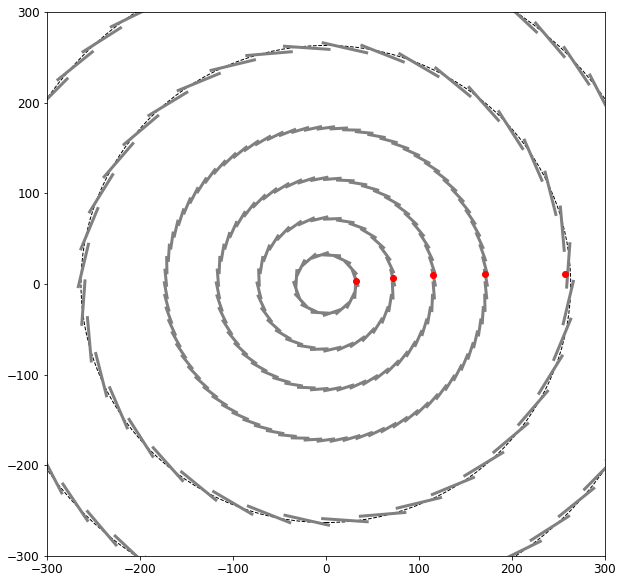

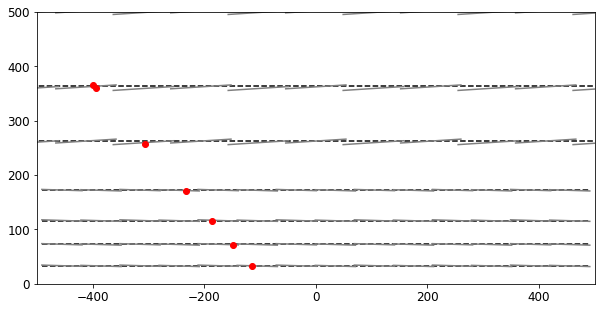

In [21]:
sTest = solutions[1]
testX = np.array(sTest[0])
testY = np.array(sTest[1])
testZ = np.array(sTest[2])
testR = np.array(sTest[3])


truthHits_raw = []
for tH in sTest[10]:
    print(tH)
    truthHits_raw.append( (tH[1],tH[2],tH[3]) )
tHits = np.array(truthHits_raw)

    
fig, ax = plt.subplots(1, figsize=(10,10))
zoom = 300
ax.set_xlim((-1*zoom, zoom))
ax.set_ylim((-1*zoom, zoom))

detGeo.drawDetectorXY(ax,True)

plt.plot(tHits[:,0],tHits[:,1],'ro')
    
fig, ax = plt.subplots(1, figsize=(10,5))
zoom = 500
ax.set_xlim((-500, 500))
ax.set_ylim((0, zoom))

detGeo.drawDetectorZR(ax,True)
plt.plot(tHits[:,2],np.sqrt(tHits[:,0]**2+tHits[:,1]**2),'ro')



Truth Track, 1/Rc / phi / theta / z0 / q 0.0005869217638902878 0.11779721249126889 2.275349996296995 -87.82713655854397 1
-147.5387531810462 -82.98923663701109
-221.52712109774393 -76.99461884594554
-302.2543465961009 -70.45401150695602
-404.48373965027065 -62.171275238704624
-563.7808406778427 -49.26485139434868
-764.9047131531863 -32.96957717629692
-752.8623042354698 -33.945266203884444
-1011.6958706760936 -12.974290008587957
-1314.462507613453 11.556191193122345
-1608.8615606664662 35.40872167590601
-1972.2341632041794 64.84956392303945


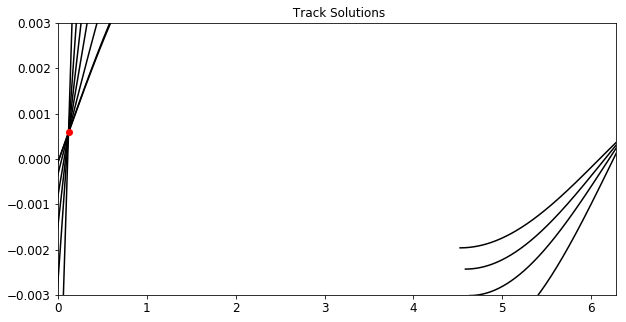

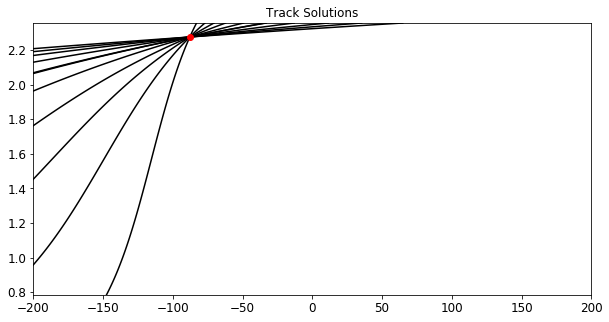

In [22]:
plt.figure(1, figsize=(10, 5))
plt.title(" Track Solutions")
plt.axis([0, 2*np.pi, -3*0.001,3*0.001])  

plt.figure(2, figsize=(10, 5))
plt.title("Track Solutions")
plt.axis([-200, 200, np.pi/4,3*np.pi/4]) 

soln = solutions[1]

truePhi = soln[5]
trueQ   = soln[8]
trueRc  = soln[4]
trueTheta = soln[6]
trueZ0    = soln[7]
print("Truth Track, 1/Rc / phi / theta / z0 / q",1./trueRc,truePhi,trueTheta, trueZ0, trueQ)

m_max = np.tan(np.pi/4)
m_min = np.tan(3*np.pi/4)

for hitItr in range(len(soln[10])):

    hitX   = soln[10][hitItr][1]    
    hitY   = soln[10][hitItr][2]    
    hitZ   = soln[10][hitItr][3]        
    hitR   = np.sqrt(hitX**2+hitY**2)

    hitPhi = np.arctan2(hitY, hitX)   

    # Convert 0-2Pi
    if hitPhi<0: hitPhi += 2*np.pi
    
    # Only consider plasiblel track (eg: from the orgin)
    phiXRange = np.linspace(hitPhi-np.pi/2, hitPhi+np.pi/2, 500)
    
    f = getHT(hitR, hitPhi,  phiXRange)

    plt.figure(1)
    plt.plot(phiXRange,f,"k")
    
    plt.figure(2)
    # Only consider plasiblel track (eg: from the orgin)

    #phiXRange = np.linspace(hitPhi-np.pi/2, hitPhi+np.pi/2, 500)
    z0Min = hitZ-(hitR/m_max)
    z0Max = hitZ-(hitR/m_min)    
    print(z0Min,z0Max)
    z0Range = np.linspace(z0Min, z0Max, 100)
    f = getHT_ZR(hitZ, hitR,  z0Range)
    plt.plot(z0Range,f,"k")

plt.figure(1)
plt.plot(truePhi,trueQ*1/trueRc,"ro")   

plt.figure(2)
plt.plot(trueZ0,trueTheta,"ro")    


plt.show()

# HT Algorithm

Basic idea here is to run the 2D HT algo twice.
First with theta/z0 with coarse binning to get the hits input in to the second HT
which will be Q/pt and phi

In [23]:
from HTTrackFinder import HTTrackFinding

def getHTForTrackFinding(hitR,hitPhi,phi):
    #Convert 0-2Pi
    if hitPhi<0: hitPhi += 2*np.pi
    phi_circle = phi - np.pi/2
    return 2/hitR*(np.cos(hitPhi-phi_circle))

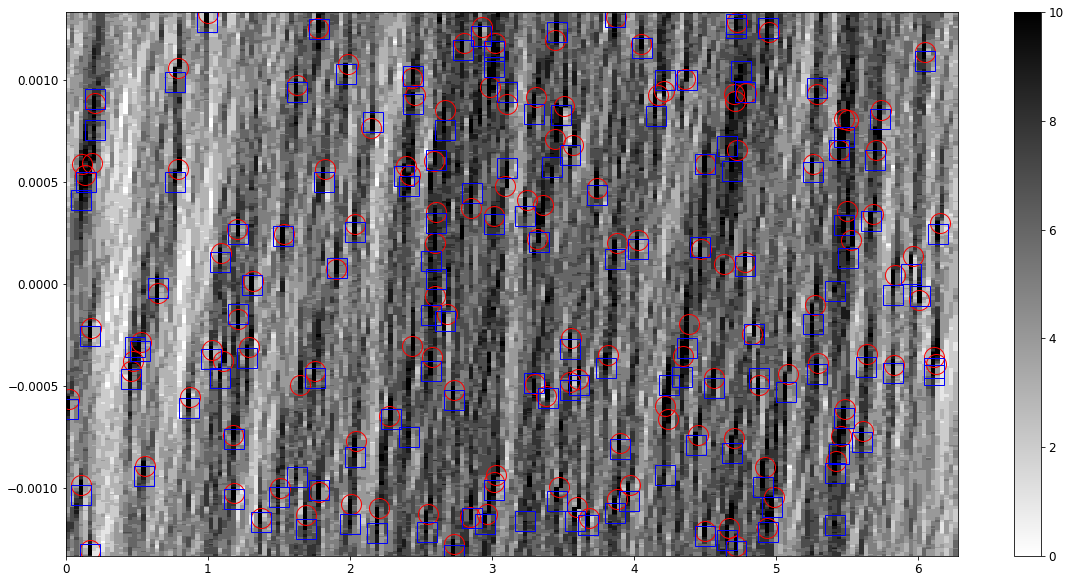

In [25]:

HTFinderPtPhi = HTTrackFinding(0,2*np.pi,200,-1.33*0.001,1.33*0.001,400,getHTFunction=getHTForTrackFinding,
                               nLayers=len(detGeo.layers),
                               minHitsPerTrack=len(detGeo.layers)-2)

fig, ax = plt.subplots(1, figsize=(20,10))

#
# Loop on rec hits
# 
for hitInfo in recHits:
    
    # hitInfo format (hitID,xHits[hitItr],yHits[hitItr],zHits[hitItr],hitItr)

    hitID  = hitInfo[0]
    hitX   = hitInfo[1]    
    hitY   = hitInfo[2]    

    hitVolID = int(hitInfo[4])
    hitLayID = int(hitInfo[5])    
    globalLayID = detGeo.getGlobalLayerID(hitVolID,hitLayID)
    
    # convert to r and phi
    hitR = np.sqrt(hitX**2 + hitY**2)
    hitPhi = np.arctan2(hitY, hitX)
    if hitPhi<0: hitPhi += 2*np.pi
    
    HTFinderPtPhi.addHit(globalLayID, hitID, hitR, hitPhi)


#    
# Plot Truth
#
for part in eventParticles:
    # part format (trkI,pt,phi,theta,z0,q,6)
    truePhi = part[2]
    trueQ   = part[5]
    trueRc  = part[1]    
    #eventParticles.append((trkI,pt,phi,q,6))

    ax.plot(truePhi,trueQ*1/trueRc,
            "o",markersize=20,markeredgewidth=1,markeredgecolor='r',markerfacecolor='None')

X, Y = np.meshgrid(HTFinderPtPhi.xBins, HTFinderPtPhi.yBins)
cmap = plt.get_cmap('binary')

HTFinderPtPhi.combineLayerMaps()

#
#  Tracks
#
plt.figure(1)

ax.set_xlim(0,2*np.pi)
ax.set_ylim(-1.33*0.001,1.33*0.001)
H = np.array(HTFinderPtPhi.HitDB.combinedHitsCounts).T
im = ax.pcolormesh(X, Y, H,cmap=cmap)
fig.colorbar(im, ax=ax)

recoTracks = HTFinderPtPhi.findTracks()
for rT in recoTracks:
    recPhi, recCurv, recQ  = rT[0]

    ax.plot(recPhi,recCurv,
            "s",markersize=20,markeredgewidth=1,markeredgecolor='b',markerfacecolor='None')

        
plt.show()

In [26]:
solns = HTFinderPtPhi.getSolutions()

from TrackHelper import getTruthDF
truth = getTruthDF(eventTruth)
truth.head()


hit_id  particle_id  weight
0     0.0          0.0     1.0
1     1.0          0.0     1.0
2     2.0          0.0     1.0
3     3.0          0.0     1.0
4     4.0          0.0     1.0

In [29]:
from trackml.score import score_event

score_event(truth,solns)

0.21718991250643335

In [30]:
# given global posision and z0 range, return consistent theta
def getHT_ZRForTracking(hitZ, hitR, z):
    #f = np.arctan2((hitZ - z),hitR)
    #f[f<0] = f[f<0]+2*np.pi
    f = np.arctan2(hitR,(hitZ - z))
    return f

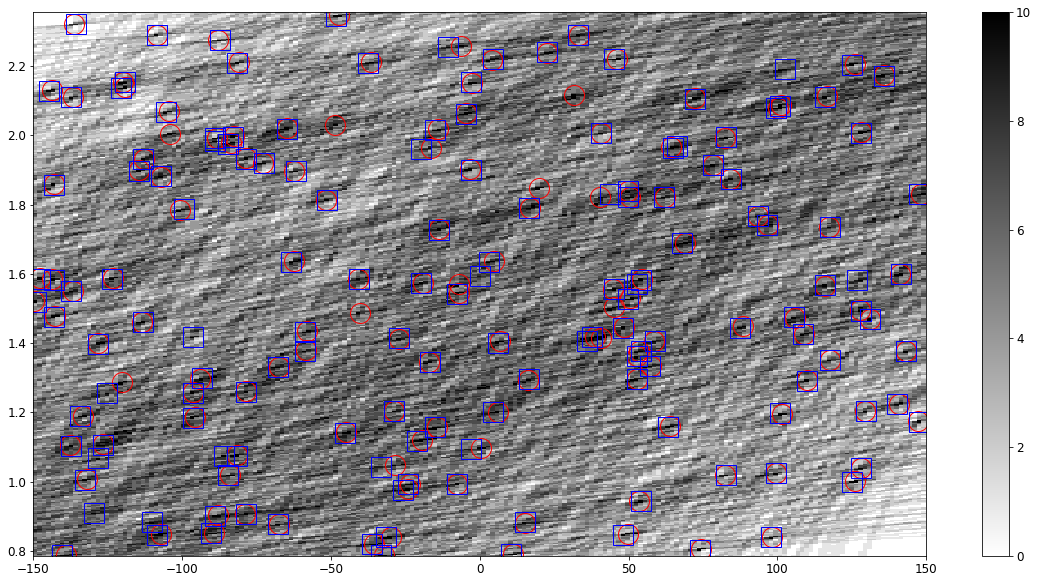

In [31]:


HTFinderZTheta = HTTrackFinding(-150,150,200,np.pi/4,3*np.pi/4,400,getHTFunction=getHT_ZRForTracking,
                                nLayers=len(detGeo.layers),
                                minHitsPerTrack=len(detGeo.layers)-2)

fig, ax = plt.subplots(1, figsize=(20,10))

#
# Loop on rec hits
# 
for hitInfo in recHits:
    
    # hitInfo format (hitID,xHits[hitItr],yHits[hitItr],zHits[hitItr],hitItr)

    hitID  = hitInfo[0]
    hitX   = hitInfo[1]    
    hitY   = hitInfo[2]    
    hitZ   = hitInfo[3]    

    hitVolID = int(hitInfo[4])
    hitLayID = int(hitInfo[5])    
    globalLayID = detGeo.getGlobalLayerID(hitVolID,hitLayID)
    
    # convert to r and phi
    hitR = np.sqrt(hitX**2 + hitY**2)
    
    HTFinderZTheta.addHit(globalLayID, hitID, hitZ, hitR,doRangeCut=False)


#    
# Plot Truth
#
for part in eventParticles:
    # part format (trkI,pt,phi,theta,z0,q,6)
    truePhi = part[2]
    trueQ   = part[5]
    trueRc  = part[1]    
    trueZ0  = part[4]
    trueTheta  = part[3]

    ax.plot(trueZ0,trueTheta,
            "o",markersize=20,markeredgewidth=1,markeredgecolor='r',markerfacecolor='None')

X, Y = np.meshgrid(HTFinderZTheta.xBins, HTFinderZTheta.yBins)
cmap = plt.get_cmap('binary')

HTFinderZTheta.combineLayerMaps()

#
#  Tracks
#
plt.figure(1)

ax.set_xlim(-150,150)
ax.set_ylim(np.pi/4,3*np.pi/4)
H = np.array(HTFinderZTheta.HitDB.combinedHitsCounts).T
im = ax.pcolormesh(X, Y, H,cmap=cmap)
fig.colorbar(im, ax=ax)

recoTracks = HTFinderZTheta.findTracks()
for rT in recoTracks:
    recZ0, recTheta, recQ  = rT[0]

    ax.plot(recZ0,recTheta,
            "s",markersize=20,markeredgewidth=1,markeredgecolor='b',markerfacecolor='None')

        
plt.show()

In [33]:
solnsZT = HTFinderZTheta.getSolutions()
score_event(truth,solnsZT)

0.28306742151312403

In [34]:
from HTTrackFinder import HTTrackFinding


HTFinderZThetaCoarse = HTTrackFinding(-150,150,20,np.pi/4,3*np.pi/4,20,getHTFunction=getHT_ZRForTracking,
                                      nLayers=len(detGeo.layers),
                                      minHitsPerTrack=len(detGeo.layers)-2)


#
# Loop on rec hits
# 
for hitInfo in recHits:
    
    # (hitID,hitX,hitY,hitZ,hitZ,hitLay,hitPhi)) 
    hitID  = hitInfo[0]
    hitX   = hitInfo[1]    
    hitY   = hitInfo[2]    
    hitZ   = hitInfo[3]        

    hitVolID = int(hitInfo[4])
    hitLayID = int(hitInfo[5])    
    globalLayID = detGeo.getGlobalLayerID(hitVolID,hitLayID)

    # convert to r and phi
    hitR = np.sqrt(hitX**2 + hitY**2)
    HTFinderZThetaCoarse.addHit(globalLayID, hitID, hitZ, hitR,doRangeCut=False)

HTFinderZThetaCoarse.combineLayerMaps()

In [35]:
matchedHits = HTFinderZThetaCoarse.getHitsInBin(0,0,recHits)
matchedHits[0:10]

array([[1470.        ,  -31.38256512,   -5.50006613, -121.80103696,
           8.        ,    2.        ,   81.        ],
       [ 602.        ,  -24.50545182,  -23.09057093, -119.70312617,
           8.        ,    2.        ,   83.        ],
       [1052.        ,   31.83715968,    4.19986642, -106.91225775,
           8.        ,    2.        ,   89.        ],
       [ 832.        ,  -30.21243124,   -8.84680156, -122.68009305,
           8.        ,    2.        ,   81.        ],
       [1651.        ,   31.21527608,   -4.85788312, -110.76081529,
           8.        ,    2.        ,   88.        ],
       [1324.        ,   14.55797516,   27.88408419, -111.99641414,
           8.        ,    2.        ,   91.        ],
       [ 601.        ,  -22.9143551 ,  -21.54090818, -118.67225794,
           8.        ,    2.        ,   82.        ],
       [1790.        ,  -14.54530396,   29.16286069, -105.30084748,
           8.        ,    2.        ,   94.        ],
       [1921.        ,  

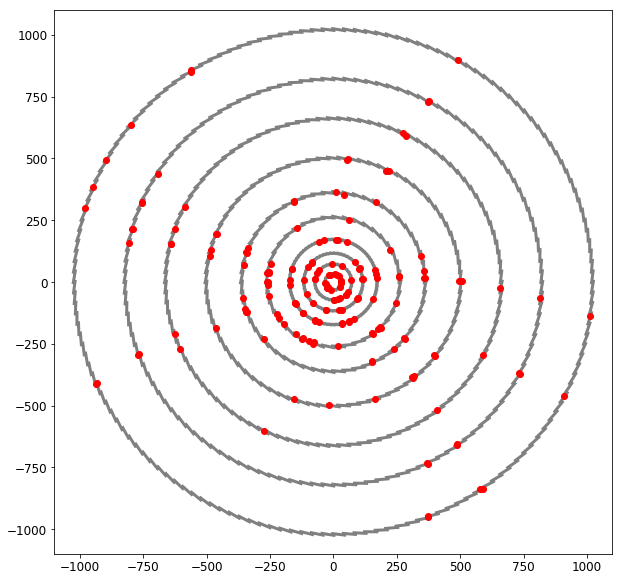

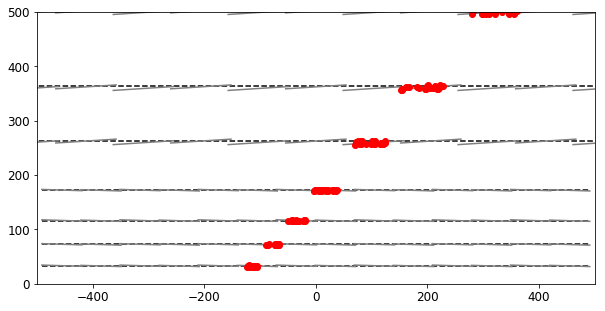

In [36]:
fig, ax = plt.subplots(1, figsize=(10,10))
zoom = 1100
ax.set_xlim((-1*zoom, zoom))
ax.set_ylim((-1*zoom, zoom))

detGeo.drawDetectorXY(ax,True)
plt.plot(matchedHits[:,1],matchedHits[:,2],'ro')

fig, ax = plt.subplots(1, figsize=(10,5))
zoom = 500
ax.set_xlim((-500, 500))
ax.set_ylim((0, zoom))

detGeo.drawDetectorZR(ax,True)

plt.plot(matchedHits[:,3],np.sqrt(matchedHits[:,2]**2+matchedHits[:,1]**2),'ro')


In [37]:
allRecoTracks = []
for iX in range(HTFinderZThetaCoarse.nXBins-1):
    for iY in range(HTFinderZThetaCoarse.nYBins-1):
        thisMatchedHits = HTFinderZThetaCoarse.getHitsInBin(iX,iY,recHits)
        
        if len(thisMatchedHits) < 5: continue
        
        HTFinderPtPhiFine = HTTrackFinding(0,2*np.pi,200,-1.33*0.001,1.33*0.001,400,
                                           getHTFunction=getHTForTrackFinding,
                                           nLayers=len(detGeo.layers),
                                           minHitsPerTrack=len(detGeo.layers)-2)

        thisZ0    = HTFinderZThetaCoarse.HitDB.getXCenter(iX)
        thisTheta = HTFinderZThetaCoarse.HitDB.getYCenter(iY) 
        
        #
        # Loop on rec hits
        # 
        for hitInfo in thisMatchedHits:

            hitID  = hitInfo[0]
            hitX   = hitInfo[1]    
            hitY   = hitInfo[2]    
            
            hitVolID = int(hitInfo[4])
            hitLayID = int(hitInfo[5])    
            globalLayID = detGeo.getGlobalLayerID(hitVolID,hitLayID)

            # convert to r and phi
            hitR = np.sqrt(hitX**2 + hitY**2)
            hitPhi = np.arctan2(hitY, hitX)
            if hitPhi<0: hitPhi += 2*np.pi
            
            HTFinderPtPhiFine.addHit(globalLayID, hitID, hitR, hitPhi)  
        
        HTFinderPtPhiFine.combineLayerMaps()
        recoTracks = HTFinderPtPhiFine.findTracks()

        #
        #  Add the Z0 and theta measurements
        #
        for t in recoTracks:
            t[0].append(thisZ0)
            t[0].append(thisTheta)
        
        allRecoTracks += recoTracks
        
        for rt in recoTracks:
            HTFinderZThetaCoarse.removeHitsFromTrack(rt,removeOverlap=False)

        print(iX,iY,len(recoTracks),len(thisMatchedHits))


0 0 1 192
0 1 0 172
0 2 1 159
0 3 2 158
0 4 1 150
0 5 0 137
0 6 0 109
0 7 0 110
0 8 2 125
0 9 3 128
0 10 0 91
0 11 0 91
0 12 1 100
0 13 0 89
0 14 0 66
0 15 1 57
0 16 1 61
0 17 0 23
0 18 1 16
1 0 2 152
1 1 0 150
1 2 0 142
1 3 0 127
1 4 0 146
1 5 1 139
1 6 0 112
1 7 2 112
1 8 0 91
1 9 1 97
1 10 0 96
1 11 0 97
1 12 1 107
1 13 2 105
1 14 0 71
1 15 0 55
1 16 2 68
1 17 1 26
1 18 0 10
2 0 1 159
2 1 0 140
2 2 0 152
2 3 0 126
2 4 1 132
2 5 2 140
2 6 0 101
2 7 0 91
2 8 0 89
2 9 0 79
2 10 0 92
2 11 1 98
2 12 0 85
2 13 0 102
2 14 1 84
2 15 1 52
2 16 0 53
2 17 1 27
2 18 0 14
3 0 1 149
3 1 1 152
3 2 1 148
3 3 1 144
3 4 0 120
3 5 1 142
3 6 0 115
3 7 0 96
3 8 0 92
3 9 0 82
3 10 0 80
3 11 0 85
3 12 0 82
3 13 1 99
3 14 3 94
3 15 0 43
3 16 1 64
3 17 0 30
3 18 0 21
4 0 1 140
4 1 0 135
4 2 0 132
4 3 0 143
4 4 0 123
4 5 1 130
4 6 0 120
4 7 0 97
4 8 0 95
4 9 0 90
4 10 0 87
4 11 0 86
4 12 0 92
4 13 1 87
4 14 1 80
4 15 0 35
4 16 0 51
4 17 0 38
4 18 0 25
5 0 0 129
5 1 0 149
5 2 0 124
5 3 0 123
5 4 0 129
5 5 0 1

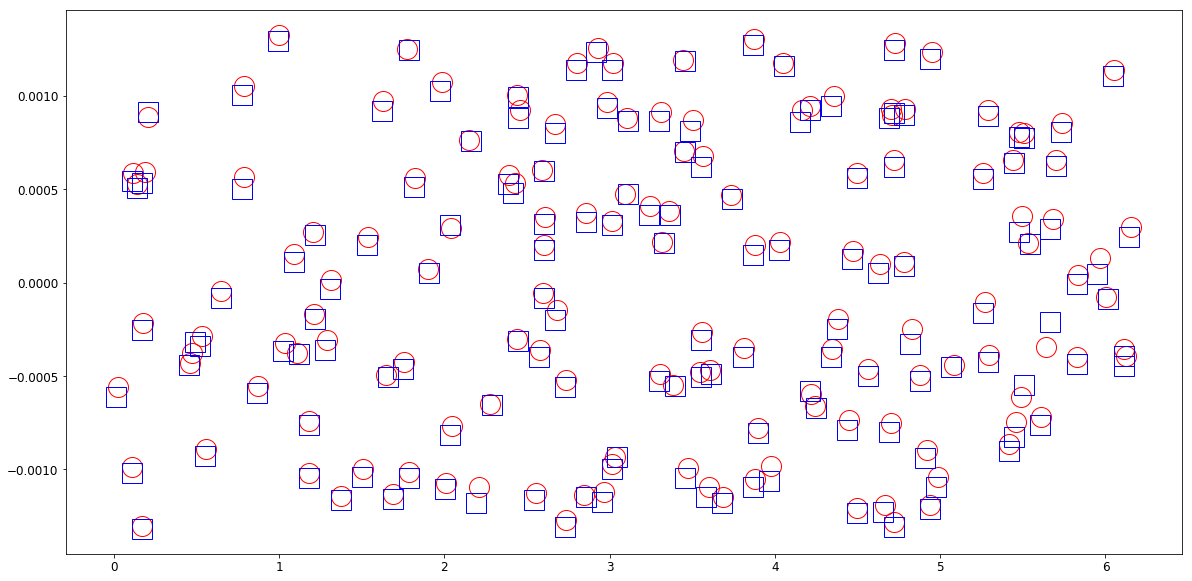

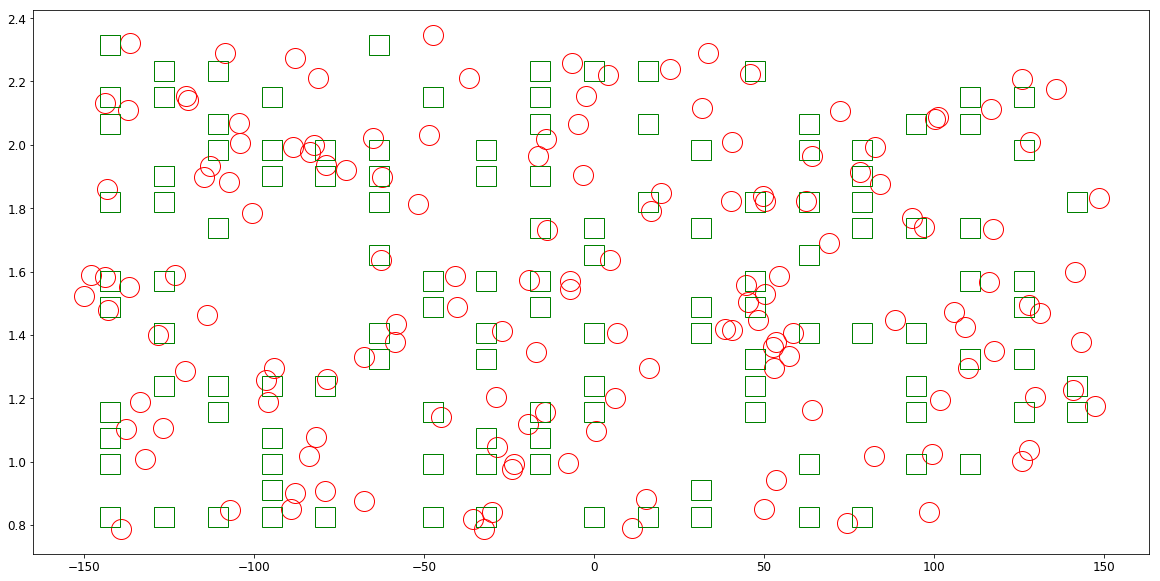

In [44]:
#fig, ax = plt.subplots(1, figsize=(20,10))
plt.figure(1, figsize=(20, 10))
plt.figure(1)
#ax.set_xlim(0,2*np.pi)
#ax.set_ylim(-3*0.001,3*0.001)

plt.figure(2, figsize=(20, 10))
#ax.set_xlim(-150,150)
#ax.set_ylim(np.pi/4,3*np.pi/4)


#    
# Plot Truth
#
for part in eventParticles:
    # part format (trkI,pt,phi,theta,z0,q,6)
    truePhi = part[2]
    trueQ   = part[5]
    trueRc  = part[1]    
    trueZ0  = part[4]    
    trueTheta  = part[3] 
    #eventParticles.append((trkI,pt,phi,q,6))
    plt.figure(1)
    plt.plot(truePhi,trueQ*1/trueRc,
            "o",markersize=20,markeredgewidth=1,markeredgecolor='r',markerfacecolor='None')
    
    plt.figure(2)
    plt.plot(trueZ0,trueTheta,
            "o",markersize=20,markeredgewidth=1,markeredgecolor='r',markerfacecolor='None')


#
#  Tracks
#
#ax.set_xlim(0,2*np.pi)
#ax.set_ylim(-1.33*0.001,1.33*0.001)
for rT in allRecoTracks:
    recPhi, recCurv, recQ, recZ0, recTheta  = rT[0]

    plt.figure(1)
    plt.plot(recPhi,recCurv,
            "s",markersize=20,markeredgewidth=1,markeredgecolor='b',markerfacecolor='None')

    plt.figure(2)
    plt.plot(recZ0,recTheta,
            "s",markersize=20,markeredgewidth=1,markeredgecolor='g',markerfacecolor='None')
        
plt.show()

PRETTY DAMN GOOD

In [46]:
solnsAll = HTFinderPtPhiFine.getSolutionsFromTracks(allRecoTracks)
score_event(truth,solnsAll)

0.640247040658775

# Now lets try to add the fitting

First do the road finding as above

In [55]:

HTFinderZThetaCoarseFitting = HTTrackFinding(-150,150,20,np.pi/4,3*np.pi/4,20,getHTFunction=getHT_ZRForTracking,
                                             nLayers=len(detGeo.layers),
                                             minHitsPerTrack=len(detGeo.layers)-2)


#
# Loop on rec hits
# 
for hitInfo in recHits:
    
    # (hitID,hitX,hitY,hitZ,hitZ,hitLay,hitPhi)) 
    hitID  = hitInfo[0]
    hitX   = hitInfo[1]    
    hitY   = hitInfo[2]    
    hitZ   = hitInfo[3]        

    hitVolID = int(hitInfo[4])
    hitLayID = int(hitInfo[5])    
    globalLayID = detGeo.getGlobalLayerID(hitVolID,hitLayID)

    # convert to r and phi
    hitR = np.sqrt(hitX**2 + hitY**2)
    HTFinderZThetaCoarseFitting.addHit(globalLayID, hitID, hitZ, hitR,doRangeCut=False)

HTFinderZThetaCoarseFitting.combineLayerMaps()

In [56]:
allRecoRoads = []
for iX in range(HTFinderZThetaCoarseFitting.nXBins-1):
    for iY in range(HTFinderZThetaCoarseFitting.nYBins-1):
        thisMatchedHits = HTFinderZThetaCoarseFitting.getHitsInBin(iX,iY,recHits)
        
        if len(thisMatchedHits) < 5: continue
        
        HTFinderPtPhiFine = HTTrackFinding(0,2*np.pi,200,-1.33*0.001,1.33*0.001,400,
                                           getHTFunction=getHTForTrackFinding,
                                           nLayers=len(detGeo.layers),
                                           minHitsPerTrack=len(detGeo.layers)-2)

        thisZ0    = HTFinderZThetaCoarseFitting.HitDB.getXCenter(iX)
        thisTheta = HTFinderZThetaCoarseFitting.HitDB.getYCenter(iY) 
        
        #
        # Loop on rec hits
        # 
        for hitInfo in thisMatchedHits:

            hitID  = hitInfo[0]
            hitX   = hitInfo[1]    
            hitY   = hitInfo[2]    
            
            hitVolID = int(hitInfo[4])
            hitLayID = int(hitInfo[5])    
            globalLayID = detGeo.getGlobalLayerID(hitVolID,hitLayID)

            # convert to r and phi
            hitR = np.sqrt(hitX**2 + hitY**2)
            hitPhi = np.arctan2(hitY, hitX)
            if hitPhi<0: hitPhi += 2*np.pi
            
            HTFinderPtPhiFine.addHit(globalLayID, hitID, hitR, hitPhi)  
        
        HTFinderPtPhiFine.combineLayerMaps()
        recoRoads = HTFinderPtPhiFine.findTracks(overlapLogicFirstHit=False)

        #
        #  Add the Z0 and theta measurements
        #
        for r in recoRoads:
            r[0].append(thisZ0)
            r[0].append(thisTheta)
        
        allRecoRoads += recoRoads
        
        for rR in recoRoads:
            HTFinderZThetaCoarseFitting.removeHitsFromTrack(rR,removeOverlap=False)

        print(iX,iY,len(recoRoads),len(thisMatchedHits))

0 0 1 192
0 1 0 173
0 2 1 159
0 3 2 158
0 4 1 150
0 5 0 137
0 6 0 109
0 7 0 110
0 8 2 125
0 9 3 132
0 10 0 101
0 11 0 95
0 12 1 101
0 13 0 92
0 14 0 67
0 15 1 58
0 16 1 63
0 17 0 23
0 18 1 16
1 0 2 155
1 1 0 153
1 2 0 145
1 3 0 130
1 4 0 149
1 5 1 142
1 6 0 115
1 7 2 112
1 8 0 96
1 9 1 105
1 10 0 110
1 11 0 106
1 12 1 111
1 13 2 110
1 14 0 74
1 15 0 59
1 16 2 75
1 17 1 29
1 18 0 15
2 0 1 164
2 1 0 145
2 2 0 156
2 3 0 131
2 4 1 135
2 5 2 145
2 6 0 105
2 7 0 97
2 8 0 97
2 9 0 83
2 10 0 102
2 11 1 107
2 12 0 93
2 13 0 112
2 14 1 88
2 15 1 56
2 16 0 66
2 17 1 35
2 18 0 23
3 0 1 154
3 1 1 157
3 2 1 151
3 3 1 148
3 4 0 124
3 5 1 151
3 6 0 123
3 7 0 98
3 8 0 100
3 9 0 88
3 10 0 87
3 11 0 93
3 12 0 89
3 13 1 109
3 14 3 100
3 15 0 52
3 16 1 79
3 17 0 39
3 18 0 30
4 0 1 148
4 1 0 149
4 2 0 139
4 3 0 151
4 4 0 127
4 5 1 136
4 6 0 130
4 7 0 102
4 8 0 102
4 9 0 97
4 10 0 96
4 11 0 93
4 12 0 100
4 13 1 98
4 14 1 94
4 15 0 43
4 16 0 63
4 17 0 51
4 18 0 34
5 0 0 136
5 1 0 161
5 2 0 130
5 3 0 131
5 4 0

In [57]:
#print(recHits[:,2])
x2s = np.array(recHits[:,1]**2,dtype=float)
y2s = np.array(recHits[:,2]**2,dtype=float)

Rs = np.sqrt(x2s + y2s)
Phis = np.arctan2(recHits[:,2],recHits[:,1])
Phis[Phis<0] = Phis[Phis<0] +2*np.pi

recHitsNew = np.c_[recHits,Rs,Phis]

In [118]:
fittedTracks3D = HTFinderZThetaCoarseFitting.fitTracks3D(allRecoRoads,recHitsNew,chi2Cut=5e2,
                                                         hitRIndex=7, hitPhiIndex=8, hitZIndex=3)
print(len(allRecoRoads))
#print(len(fittedTracks2D))
print(len(fittedTracks3D))

151
151


/Users/johnda/Library/Python/3.6/lib/python/site-packages/scipy/optimize/minpack.py:427: RuntimeWarning: Number of calls to function has reached maxfev = 600.
  warnings.warn(errors[info][0], RuntimeWarning)


In [119]:
solnsFitted = HTFinderZThetaCoarseFitting.getSolutionsFromTracks(fittedTracks3D)
nTracksPerHit = solnsFitted["hit_id"].value_counts()

In [120]:
def printCounts(trackPerHit):
    for i in range(4):
        print(len(trackPerHit[trackPerHit > i]))
    #print(len(trackPerHit[trackPerHit > 1]))
    #print(len(trackPerHit[trackPerHit > 2]))
    #print(len(trackPerHit[trackPerHit > 3]))
    #print(len(trackPerHit[trackPerHit > 4]))


printCounts(solnsFitted["hit_id"].value_counts())
multiTperH = nTracksPerHit[nTracksPerHit > 1]

1788
65
0
0


In [121]:
multiTperH

1677.0    2
1124.0    2
930.0     2
1122.0    2
1754.0    2
959.0     2
298.0     2
877.0     2
337.0     2
1577.0    2
431.0     2
876.0     2
1468.0    2
984.0     2
390.0     2
978.0     2
1673.0    2
1682.0    2
816.0     2
1004.0    2
338.0     2
977.0     2
1069.0    2
1676.0    2
1685.0    2
622.0     2
662.0     2
620.0     2
882.0     2
931.0     2
         ..
1576.0    2
1684.0    2
1608.0    2
825.0     2
1341.0    2
389.0     2
1807.0    2
1342.0    2
817.0     2
1575.0    2
1895.0    2
1121.0    2
1806.0    2
1751.0    2
420.0     2
828.0     2
1686.0    2
670.0     2
1123.0    2
1126.0    2
635.0     2
1609.0    2
1125.0    2
671.0     2
1681.0    2
1837.0    2
1237.0    2
1849.0    2
881.0     2
861.0     2
Name: hit_id, Length: 65, dtype: int64

In [122]:
HTFinderZThetaCoarseFitting.removeOverlap(fittedTracks3D,multiTperH.index)

In [123]:
solnsCleaned = HTFinderZThetaCoarseFitting.getSolutionsFromTracks(fittedTracks3D)


In [124]:
printCounts(solnsCleaned["hit_id"].value_counts())


1788
0
0
0


In [127]:
print(score_event(truth,solnsAll))
print(score_event(truth,solnsCleaned))

0.640247040658775
0.88780236747298


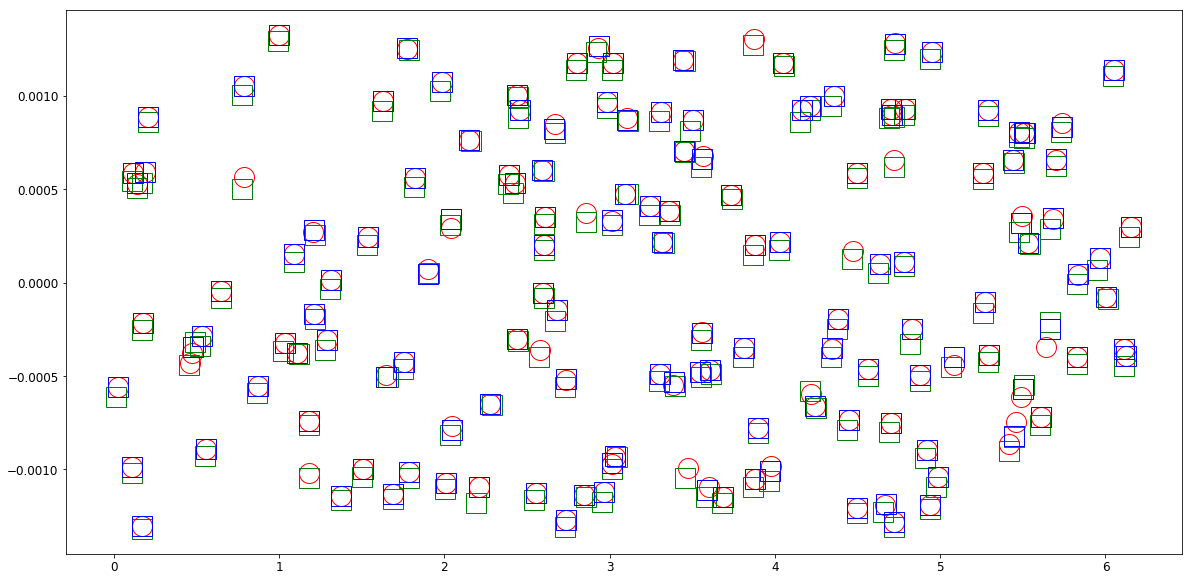

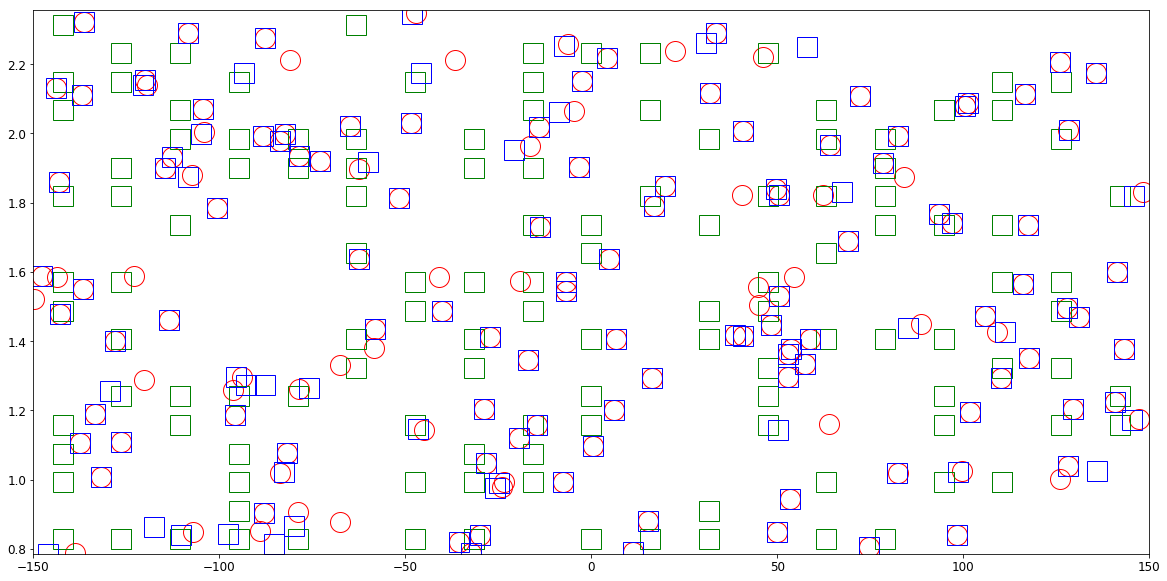

In [116]:
plt.figure(1, figsize=(20, 10))
plt.figure(1)

plt.figure(2, figsize=(20, 10))


#    
# Plot Truth
#
for part in eventParticles:
    # part format (trkI,pt,phi,theta,z0,q,6)
    truePhi = part[2]
    trueQ   = part[5]
    trueRc  = part[1]    
    trueZ0  = part[4]    
    trueTheta  = part[3] 
    #eventParticles.append((trkI,pt,phi,q,6))
    plt.figure(1)
    plt.plot(truePhi,trueQ*1/trueRc,
            "o",markersize=20,markeredgewidth=1,markeredgecolor='r',markerfacecolor='None')
    
    plt.figure(2)
    plt.plot(trueZ0,trueTheta,
            "o",markersize=20,markeredgewidth=1,markeredgecolor='r',markerfacecolor='None')


#
#  Tracks
#
for rT in allRecoRoads:
    recPhi, recCurv, recQ, recZ0, recTheta  = rT[0]

    plt.figure(1)
    plt.plot(recPhi,recCurv,
            "s",markersize=20,markeredgewidth=1,markeredgecolor='g',markerfacecolor='None')

    plt.figure(2)
    plt.plot(recZ0,recTheta,
            "s",markersize=20,markeredgewidth=1,markeredgecolor='g',markerfacecolor='None')
    
    
for fT in fittedTracks3D:
    fitPhi, fitCurv, fitQ, fitZ0, fitTheta  = fT[0]
    
    plt.figure(1)
    plt.plot(fitPhi,fitCurv,
            "s",markersize=20,markeredgewidth=1,markeredgecolor='b',markerfacecolor='None')

    plt.figure(2)
    plt.plot(fitZ0,fitTheta,
            "s",markersize=20,markeredgewidth=1,markeredgecolor='b',markerfacecolor='None')    

plt.figure(2)
#ax.set_xlim(-150,150)
#ax.set_ylim(np.pi/4,3*np.pi/4)    
plt.axis([-150, 150, np.pi/4,3*np.pi/4]) 
plt.show()

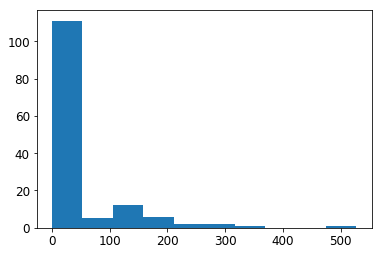

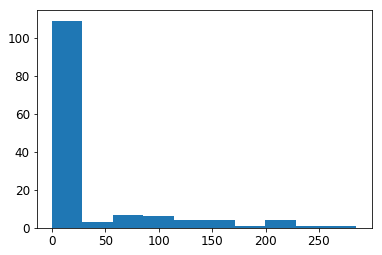

In [117]:
X2Before = []
X2After = []
for f in fittedTracks3D:
    X2Before.append(f[2])
    X2After.append(f[3])
    
#print(X2Before)
plt.hist(X2Before)
plt.show()
plt.hist(X2After)
plt.show()

In [95]:
from HTTrackFinder import DORead, correctTrackPhis, fitTrackXY
debug = False
if debug:
    testRoad = allRecoRoads[0]
    testRoadFull = DORead(testRoad,recHitsNew)
    correctTrackPhis(testRoadFull)
    testTrack2D  = fitTrackXY(testRoadFull,chi2Cut=1e6,     hitRIndex=7, hitPhiIndex=8, hitZIndex=3)
    testRoadFull

In [ ]:
from HTTrackFinder import drawTrackToFitZR